In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

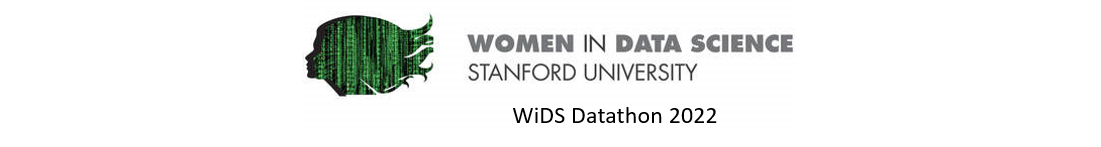

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#87CEFA;
          font-size:260%;">
WiDS Datathon 2022 
     </p>

<b>Problem Statement:</b> <p> Climate change is a globally relevant, urgent, and multi-faceted issue heavily impacted by energy policy and infrastructure. Addressing climate change involves mitigation (i.e. mitigating greenhouse gas emissions) and adaptation (i.e. preparing for unavoidable consequences). Mitigation of GHG emissions requires changes to electricity systems, transportation, buildings, industry, and land use. </p>

<p>According to a report issued by the International Energy Agency (IEA), the lifecycle of buildings from construction to demolition were responsible for 37% of global energy-related and process-related CO2 emissions in 2020. Yet it is possible to drastically reduce the energy consumption of buildings by a combination of easy-to-implement fixes and state-of-the-art strategies. For example, retrofitted buildings can reduce heating and cooling energy requirements by 50-90 percent. Many of these energy efficiency measures also result in overall cost savings and yield other benefits, such as cleaner air for occupants. This potential can be achieved while maintaining the services that buildings provide.</p>

<b>Goal: </b> <p>
The goal of this competition is to predict the energy consumption using building characteristics and climate and weather variables. </p>

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#87CEFA;
          font-size:200%;">
Importing Libraries 
     </p>

In [1]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#87CEFA;
          font-size:200%;">
Loading Files
     </p>

In [3]:
data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [4]:
print("Number of train samples are",data.shape)
print("Number of train samples are",test_data.shape)

Number of train samples are (75757, 64)
Number of train samples are (9705, 63)


In [5]:
data.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [6]:
#columns
data.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [7]:
data.describe().T.style

,count,mean,std,min,25%,50%,75%,max
Year_Factor,75757.000000,4.367755,1.471441,1.000000,3.000000,5.000000,6.000000,6.000000
floor_area,75757.000000,165983.865858,246875.790940,943.000000,62379.000000,91367.000000,166000.000000,6385382.000000
year_built,73920.000000,1952.306764,37.053619,0.000000,1927.000000,1951.000000,1977.000000,2015.000000
energy_star_rating,49048.000000,61.048605,28.663683,0.000000,40.000000,67.000000,85.000000,100.000000
ELEVATION,75757.000000,39.506323,60.656596,-6.400000,11.900000,25.000000,42.700000,1924.500000
january_min_temp,75757.000000,11.432343,9.381027,-19.000000,6.000000,11.000000,13.000000,49.000000
january_avg_temp,75757.000000,34.310468,6.996108,10.806452,29.827586,34.451613,37.322581,64.758065
january_max_temp,75757.000000,59.054952,5.355458,42.000000,56.000000,59.000000,62.000000,91.000000
february_min_temp,75757.000000,11.720567,12.577272,-13.000000,2.000000,9.000000,20.000000,48.000000
february_avg_temp,75757.000000,35.526837,8.866697,13.250000,31.625000,34.107143,40.879310,65.107143


<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#87CEFA;
          font-size:200%;">
EDA 
     </p>

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#FFFFFF;
          font-size:150%;">
Checking Null values
     </p>

In [8]:
cols_with_missing = [col for col in data.columns 
                                 if data[col].isnull().any()]
miss_count =data.isna().sum()
miss_df = (pd.concat([miss_count.rename('Missing count'),miss_count.div(len(data)).rename('Missing value')],axis = 1).loc[miss_count.ne(0)])
miss_df.style.background_gradient(cmap="coolwarm")

,Missing count,Missing value
year_built,1837,0.024249
energy_star_rating,26709,0.352561
direction_max_wind_speed,41082,0.542287
direction_peak_wind_speed,41811,0.551909
max_wind_speed,41082,0.542287
days_with_fog,45796,0.604512


In [9]:
categorical_cols=[c for c in data.columns if (1<data[c].nunique()) & (data[c].dtype != np.number)& (data[c].dtype != int)]
categorical_cols

<ipython-input-9-aff256f2715c>:1: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  categorical_cols=[c for c in data.columns if (1<data[c].nunique()) & (data[c].dtype != np.number)& (data[c].dtype != int)]


['State_Factor', 'building_class', 'facility_type']

In [10]:
for col in categorical_cols:
    data[col]=data[col].astype('category')

In [11]:
data_binary_col = data.select_dtypes('category').columns
data_binary_col 

Index(['State_Factor', 'building_class', 'facility_type'], dtype='object')

In [12]:
num_col=data.select_dtypes('number').columns
num_col

Index(['Year_Factor', 'floor_area', 'year_built', 'energy_star_rating',
       'ELEVATION', 'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_3

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#FFFFFF;
          font-size:150%;">
Target Variable
     </p>

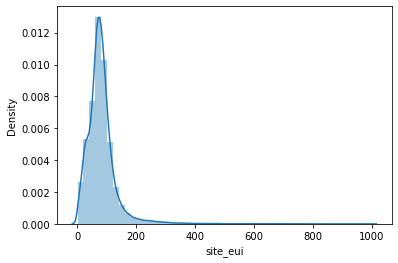

In [13]:
sns.distplot(data['site_eui'])

This graph is positively skewed and have long right side tail. 


<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#FFFFFF;
          font-size:150%;">
Univariate Analysis
     </p>

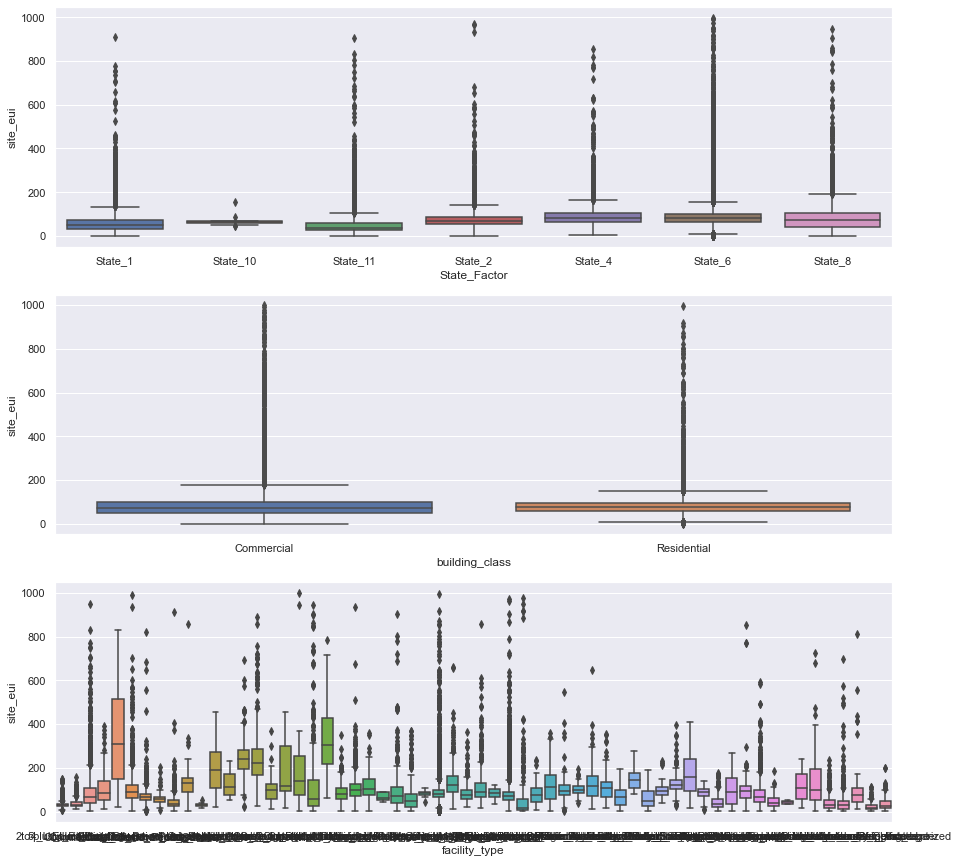

In [14]:
plt.figure(figsize=(15, 15))
sns.set(style="darkgrid")
i=1
for col in categorical_cols:
    plt.subplot(3,1,i)
    sns.boxplot(data=data, x=col, y='site_eui')
    i=i+1
plt.show()

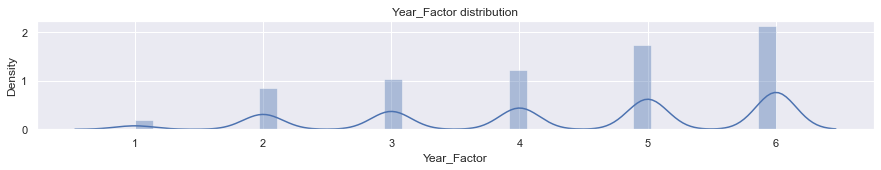

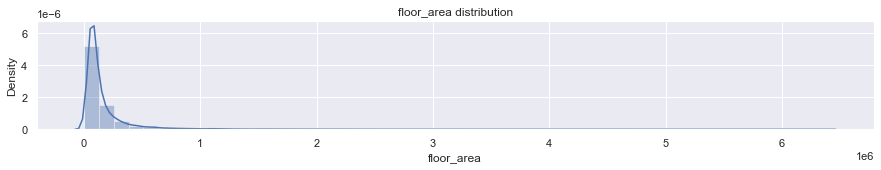

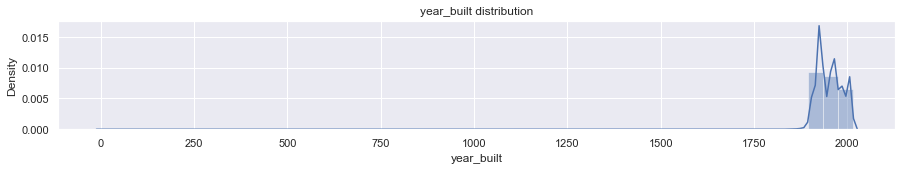

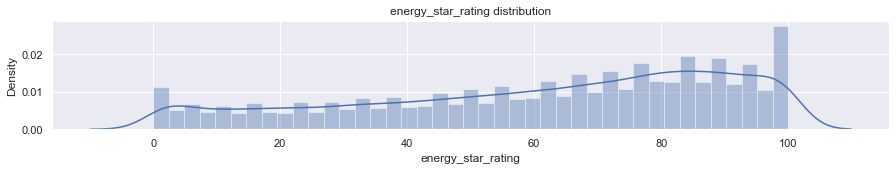

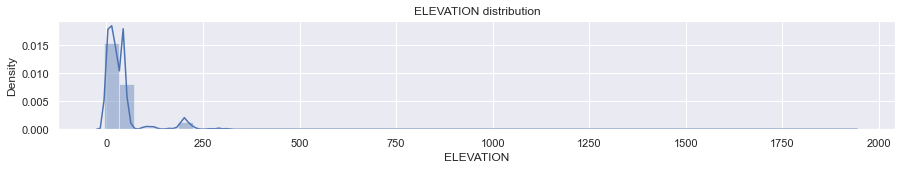

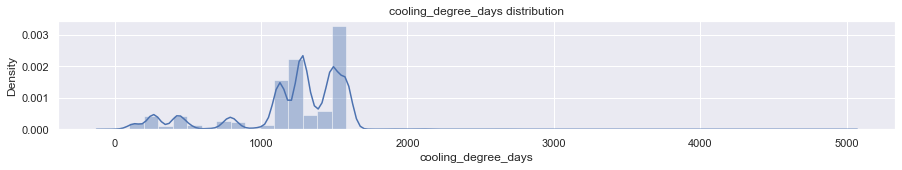

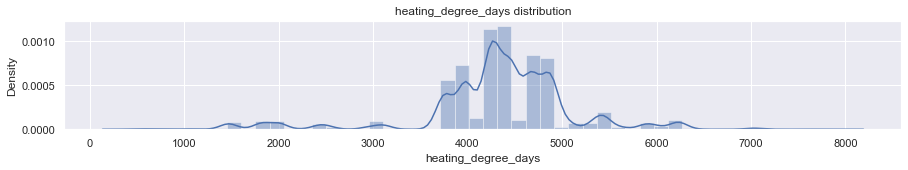

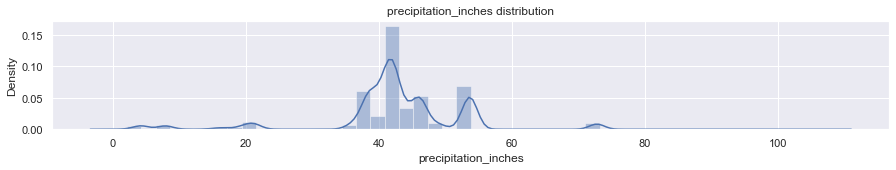

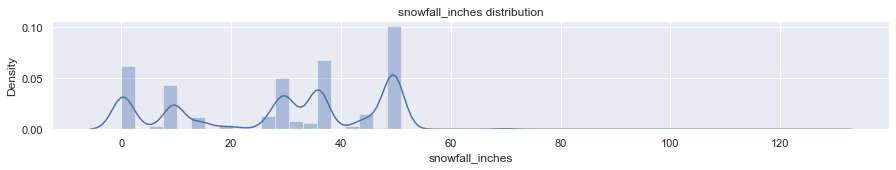

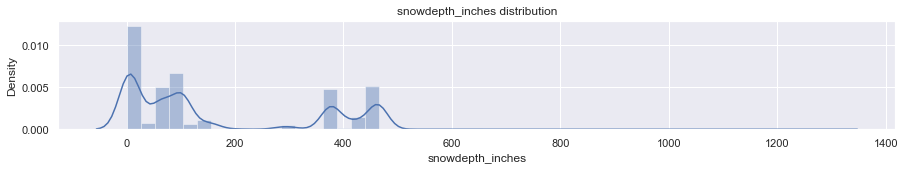

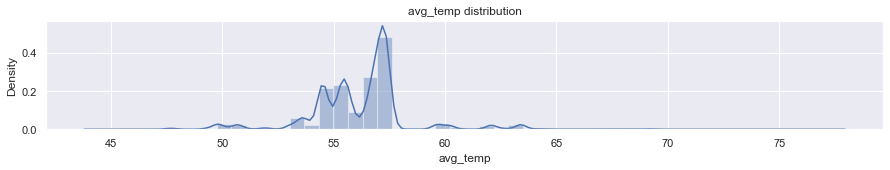

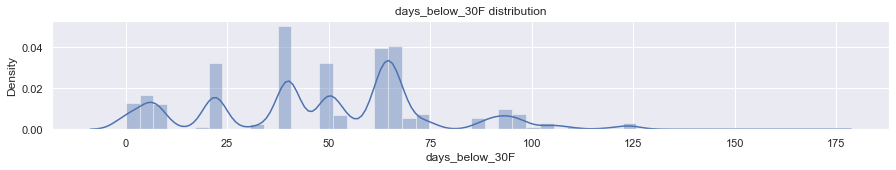

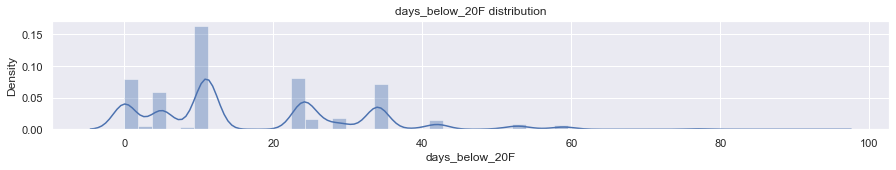

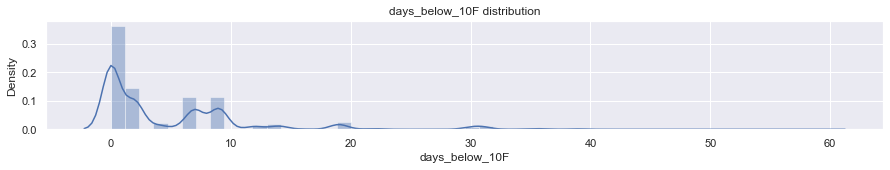

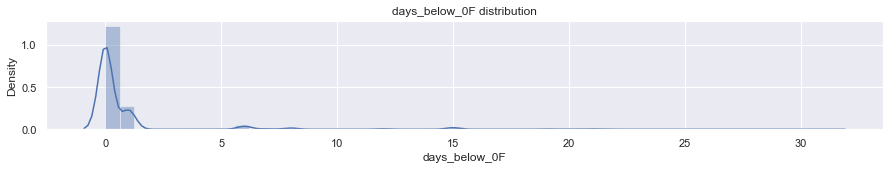

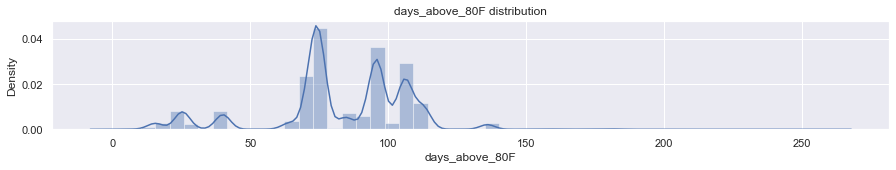

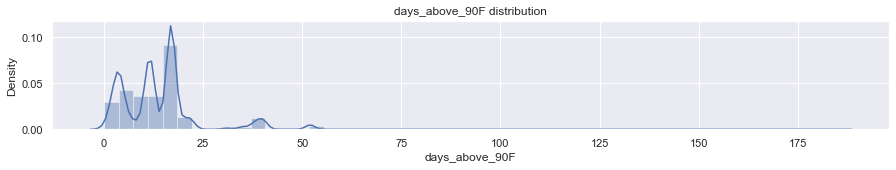

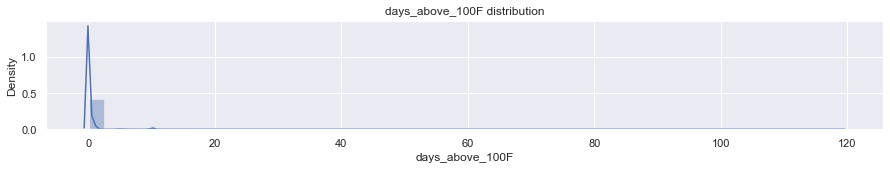

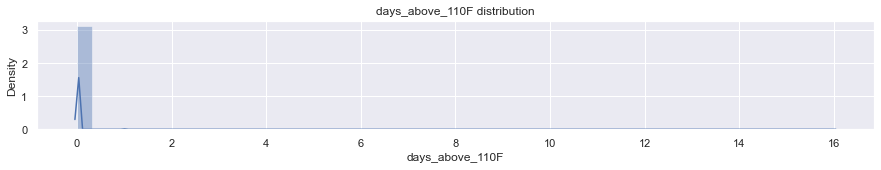

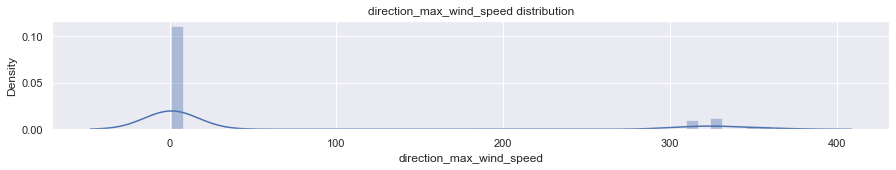

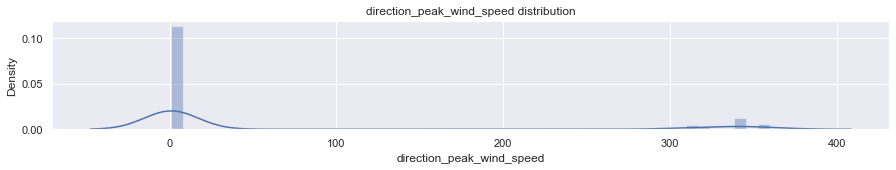

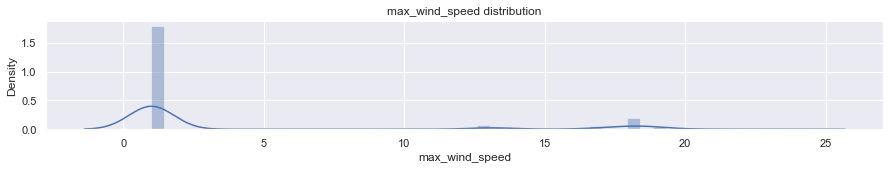

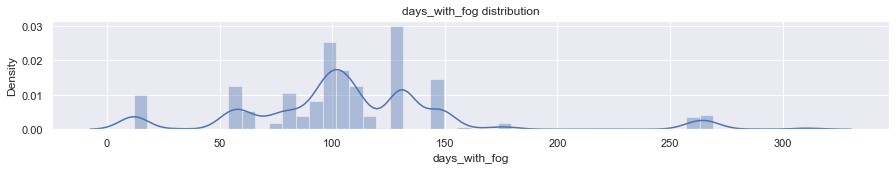

In [15]:
cols=['Year_Factor', 'floor_area', 'year_built', 'energy_star_rating',
       'ELEVATION',  'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F',
       'days_above_100F', 'days_above_110F', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']
i=1
for col in cols:
    plt.figure(figsize=(15, 2))
    sns.distplot(data[col],kde=True)
    plt.title(col+" distribution")
    #i=i+1
    plt.show()
    

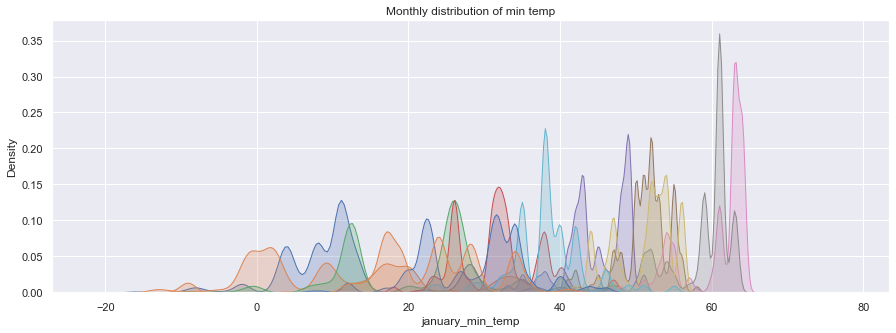

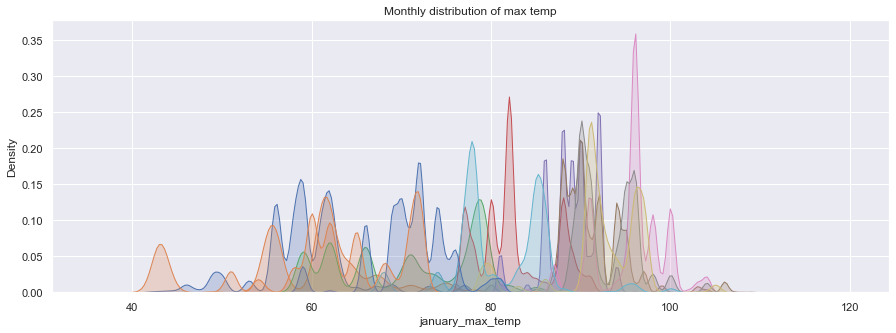

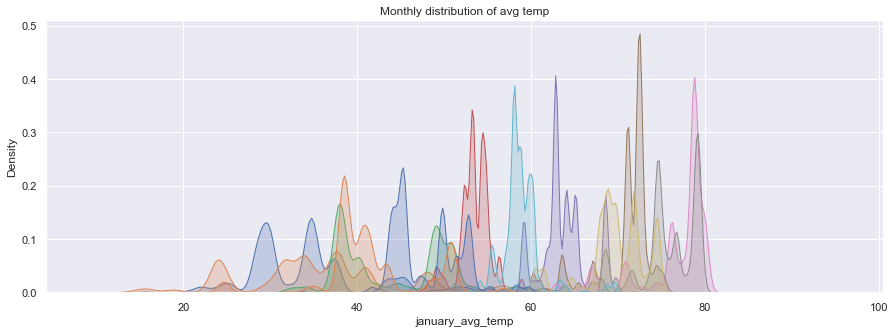

In [16]:

plt.figure(figsize=(15, 5))
min_temp=['january_min_temp', 'february_min_temp','march_min_temp','april_min_temp','may_min_temp','june_min_temp','july_min_temp','august_min_temp','september_min_temp', 'october_min_temp','november_min_temp', 'december_min_temp']
for col in min_temp:
    sns.kdeplot(data[col], shade=True)
    plt.title("Monthly distribution of min temp")

plt.figure(figsize=(15, 5))
max_temp=['january_max_temp', 'february_max_temp','march_max_temp','april_max_temp','may_max_temp','june_max_temp','july_max_temp','august_max_temp','september_max_temp', 'october_max_temp','november_max_temp', 'december_max_temp']
for col in max_temp:
    sns.kdeplot(data[col], shade=True)
    plt.title("Monthly distribution of max temp")

plt.figure(figsize=(15, 5))
avg_temp=['january_avg_temp', 'february_avg_temp','march_avg_temp','april_avg_temp','may_avg_temp','june_avg_temp','july_avg_temp','august_avg_temp','september_avg_temp', 'october_avg_temp','november_avg_temp', 'december_avg_temp']
for col in avg_temp:
    sns.kdeplot(data[col], shade=True)
    plt.title("Monthly distribution of avg temp")

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#FFFFFF;
          font-size:150%;">
Corelataion Analysis
     </p>

In [17]:
data_cor = data.corr()
data_df_upper = data_cor.where(np.triu(np.ones(data_cor.shape, dtype=np.int), k=1).astype(np.bool))
cor80 = [col for col in data_df_upper.columns if any(data_df_upper[col] >= 0.9)]
cor80

['january_avg_temp',
 'february_avg_temp',
 'march_min_temp',
 'december_avg_temp',
 'cooling_degree_days',
 'days_below_10F',
 'direction_peak_wind_speed',
 'max_wind_speed']

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#FFFFFF;
          font-size:150%;">
Handling Missing Values
     </p>

In [ ]:
# year_built: replace with current year.
data['year_built'] =data['year_built'].replace(np.nan, 2022)
#replacing rest of the values with mean
#data['energy_star_rating']=data['energy_star_rating'].replace(np.nan,data['energy_star_rating'].mean())
#data['direction_max_wind_speed']= data['direction_max_wind_speed'].replace(np.nan,data['direction_max_wind_speed'].mean())
#data['direction_peak_wind_speed']= data['direction_peak_wind_speed'].replace(np.nan,data['direction_peak_wind_speed'].mean())
#data['max_wind_speed']=data['max_wind_speed'].replace(np.nan,data['max_wind_speed'].mean())
#data['days_with_fog']=data['days_with_fog'].replace(np.nan,data['days_with_fog'].mean())

##for testdata

# year_built: replace with current year.
test_data['year_built'] =test_data['year_built'].replace(np.nan, 2022)
##replacing rest of the values with mean
#test_data['energy_star_rating']=test_data['energy_star_rating'].replace(np.nan,test_data['energy_star_rating'].mean())
#test_data['direction_max_wind_speed']= test_data['direction_max_wind_speed'].replace(np.nan,test_data['direction_max_wind_speed'].mean())
#test_data['direction_peak_wind_speed']= test_data['direction_peak_wind_speed'].replace(np.nan,test_data['direction_peak_wind_speed'].mean())
#test_data['max_wind_speed']=test_data['max_wind_speed'].replace(np.nan,test_data['max_wind_speed'].mean())
#test_data['days_with_fog']=test_data['days_with_fog'].replace(np.nan,test_data['days_with_fog'].mean())


In [ ]:
from sklearn.impute import SimpleImputer
null_col=['energy_star_rating','direction_max_wind_speed','direction_peak_wind_speed','max_wind_speed','days_with_fog']
imputer = SimpleImputer()
imputer.fit(data[null_col])
data_transformed = imputer.transform(data[null_col])
data[null_col] = pd.DataFrame(data_transformed)
test_data_transformed = imputer.transform(test_data[null_col])
test_data[null_col] = pd.DataFrame(test_data_transformed)

In [ ]:
#rechecking null values
cols_with_missing = [col for col in data.columns 
                                 if data[col].isnull().any()]
cols_with_missing

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#FFFFFF;
          font-size:150%;">
Label Encoder
     </p>

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])
    test_data[col] = le.fit_transform(test_data[col])


In [19]:
data.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,0,0,13,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,0,0,55,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,0,0,48,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,0,0,6,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,0,0,56,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [20]:
#data_binary_col1 = data[data_binary_col]
dummy_col = pd.get_dummies(data[data_binary_col], drop_first=True)
data = pd.concat([data,dummy_col], axis=1)
data = data.drop(columns=data_binary_col )

In [21]:
dummy_test = pd.get_dummies(test_data[data_binary_col], drop_first=True)
test_data = pd.concat([test_data,dummy_test], axis=1)
test_data = test_data.drop(columns=data_binary_col )

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#FFFFFF;
          font-size:150%;">
Feature Scaling
     </p>

In [ ]:
y = data['site_eui']
X = data.drop(['site_eui'], axis = 1)

In [ ]:
X.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train = scaler.fit_transform(X)
test = scaler.transform(test_data)

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#FFFFFF;
          font-size:150%;">
XGboost Model
     </p>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [ ]:
import xgboost

xgboost_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.03, gamma=0, subsample=0.75,
                           colsample_bytree=0.4, max_depth=3)
xgboost_model.fit(X_train,y_train)


In [ ]:
from sklearn.metrics import explained_variance_score
predictions = xgboost_model.predict(X_test)
print(explained_variance_score(predictions,y_test))

This model achieved the 97 % accuary and model seems to be overfitted. 
Next step is using the gridsearch to find the optimal parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb = xgboost.XGBRegressor()
parameters = {'objective':['reg:linear'],
              'learning_rate': [.02, .05, 0.01], #so called `eta` value
              'max_depth': [3,5],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.4],
              'n_estimators': [1000],
              'reg_alpha': [0.4],
              'reg_lambda': [2e-08]
}
xgb_grid = GridSearchCV(xgb,
                        parameters,
                        cv = 5,
                        verbose=True)

xgb_grid.fit(X_train,y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

<p style="padding: 10px;
          color:#000000;
          font-weight: bold;
          text-align: center;
          background-color:#FFFFFF;
          font-size:150%;">
Prediction
     </p>

In [ ]:
#testdata prediction
prediction = xgb_grid.best_estimator_.predict(test_data)
prediction 

In [ ]:
submission= pd.read_csv('/kaggle/input/widsdatathon2022/sample_solution.csv')
submission['site_eui'] = prediction
submission.to_csv("submission.csv",index=False)


In [ ]:
submission.head()

In [ ]:
# thank you